In [ ]:
#Standard Imports
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt



#Import the Data, join it on FIPS, and clean it
insec_df = pd.read_excel(r"C:\Users\ethan\Bootcamp\Project-1\Data.xlsx",sheet_name='INSECURITY')
soc_df = pd.read_excel(r"C:\Users\ethan\Bootcamp\Project-1\Data.xlsx",sheet_name='SOCIOECONOMIC')
access_df = pd.read_excel(r"C:\Users\ethan\Bootcamp\Project-1\Data.xlsx",sheet_name='ACCESS')
stores_df = pd.read_excel(r"C:\Users\ethan\Bootcamp\Project-1\Data.xlsx",sheet_name='STORES')
assist_df = pd.read_excel(r"C:\Users\ethan\Bootcamp\Project-1\Data.xlsx",sheet_name='ASSISTANCE')
merge_df = insec_df.merge(soc_df,on='FIPS',how='outer').merge(access_df,on='FIPS',how='outer').merge(stores_df,on='FIPS',how='outer').merge(assist_df,on='FIPS',how='outer')
total_df = merge_df.dropna(axis='rows')
total_df.to_csv(r"C:\Users\ethan\Bootcamp\Project-1\total_df.csv",index=False)
total_df.head()



C:\Users\ethan\AppData\Local\Temp\ipykernel_29532\4139211425.py:18: FutureWarning: Passing 'suffixes' which cause duplicate columns {'State_x', 'County_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_df = insec_df.merge(soc_df,on='FIPS',how='outer').merge(access_df,on='FIPS',how='outer').merge(stores_df,on='FIPS',how='outer').merge(assist_df,on='FIPS',how='outer')


,FIPS,State_x,County_x,FOODINSEC_10_12,FOODINSEC_13_15,CH_FOODINSEC_12_15,VLFOODSEC_10_12,VLFOODSEC_13_15,CH_VLFOODSEC_12_15,FOODINSEC_CHILD_01_07,...,REDEMP_WICS08,REDEMP_WICS12,PCH_REDEMP_WICS_08_12,PCT_WIC09,PCT_WIC15,PCH_WIC_09_15,PCT_CACFP09,PCT_CACFP15,PCH_CACFP_09_15,FDPIR12
1,1003,AL,Baldwin,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,125840.5,126639.4,0.634881,2.990417,2.719352,-0.271065,0.91609,1.055597,0.139507,0
4,1009,AL,Blount,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,102945.9,149110.0,44.843050,2.990417,2.719352,-0.271065,0.91609,1.055597,0.139507,0
6,1013,AL,Butler,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,134613.5,203713.2,51.331930,2.990417,2.719352,-0.271065,0.91609,1.055597,0.139507,0
7,1015,AL,Calhoun,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,126327.7,148999.4,17.946660,2.990417,2.719352,-0.271065,0.91609,1.055597,0.139507,0
8,1017,AL,Chambers,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,154673.6,161957.1,4.708968,2.990417,2.719352,-0.271065,0.91609,1.055597,0.139507,0


In [ ]:
# Define a function to create Linear Regression plots
def regression_plot(x,y,a,b):
    (slope,intercept,rvalue,pvalue,stderr) = stats.linregress(x,y)
    line = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,x*slope+intercept,"r-")
    plt.annotate(line,(a,b),fontsize=15,color="red")
    print("The r-value is: " + str(rvalue))

# Data Pooling

The r-value is: 0.8040290649474245


Text(0, 0.5, 'Low Access Population Count (per 10,000)')

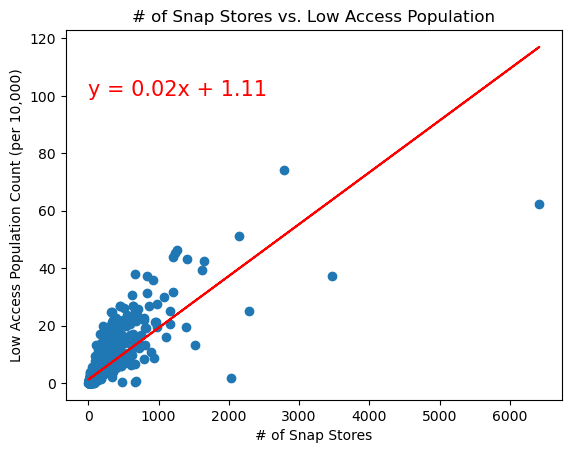

In [ ]:
# By SNAP
regression_plot(total_df['SNAPS16'],total_df['LACCESS_POP15']/10000,0,100)
plt.title('# of Snap Stores vs. Low Access Population')
plt.xlabel('# of Snap Stores')
plt.ylabel('Low Access Population Count (per 10,000)')
plt.show()
plt.savefig('Snap_v_LAccess')

The r-value is: 0.7248436880841134


Text(0, 0.5, 'Low Access Population Count (per 10,000)')

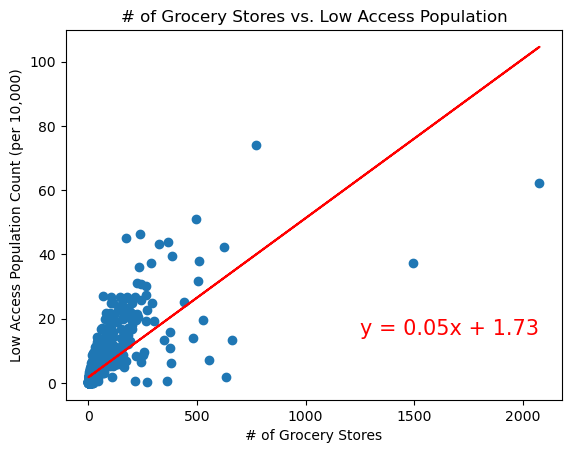

In [ ]:
# By Grocery Stores
regression_plot(total_df['GROC14'],total_df['LACCESS_POP15']/10000,1250,15)
plt.title('# of Grocery Stores vs. Low Access Population')
plt.xlabel('# of Grocery Stores')
plt.ylabel('Low Access Population Count (per 10,000)')
plt.show()
plt.savefig('Groc_v_LAccess')

The r-value is: 0.8783343694774581


Text(0, 0.5, 'Low Access Population Count (per 10,000)')

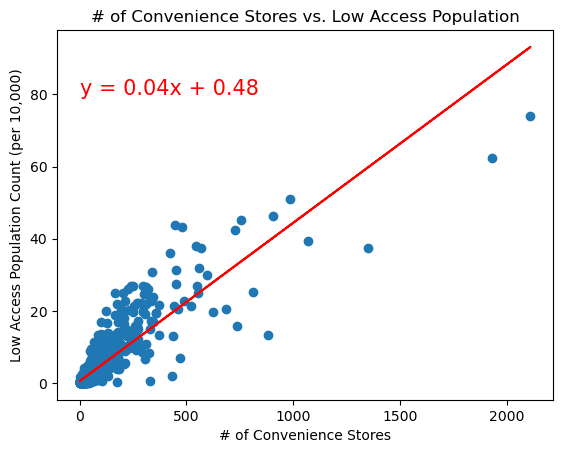

In [ ]:
# By Conv Stores
regression_plot(total_df['CONVS14'],total_df['LACCESS_POP15']/10000,0,80)
plt.title('# of Convenience Stores vs. Low Access Population')
plt.xlabel('# of Convenience Stores')
plt.ylabel('Low Access Population Count (per 10,000)')
plt.show()
plt.savefig('Conv_v_LAccess')

The r-value is: -0.005842527529028018


Text(0, 0.5, 'Low Access Population Count (%)')

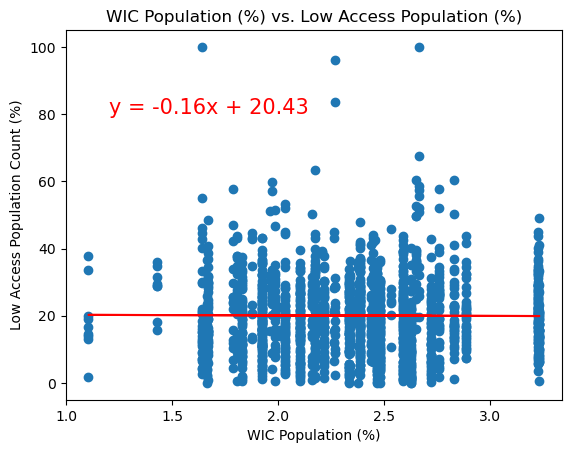

In [ ]:
# Pull Data for the Visualizations then make plots 

# By WIC
regression_plot(total_df['PCT_WIC15'],total_df['PCT_LACCESS_POP15'],1.2,80)
plt.title('WIC Population (%) vs. Low Access Population (%)')
plt.xlabel('WIC Population (%)')
plt.ylabel('Low Access Population Count (%)')
plt.show()
plt.savefig('WIC_v_LAccess')

In [ ]:
#Function to plot regressions across multiple groups
def MultiRegression_plot(x,Y,Labels):
    slopes = []
    intercepts = []
    r_vals = []
    y_values = []
    count = 0
    for y in Y:
        (slope,intercept,rvalue,pvalue,stderr) = stats.linregress(x,y)
        slopes.append(slope)
        intercepts.append(intercept)
        r_vals.append(rvalue)
        y_data = x*slope+intercept
        plt.plot(x,x*slope+intercept)
        count = count +1
    global Results
    Results = pd.DataFrame({"Race":Labels, "Slope":slopes,"Intecept":intercepts,"R Value":r_vals})

In [ ]:
#Make the 4 regressions by race
MultiRegression_plot(total_df['PCT_LACCESS_POP10'],[total_df['PCT_NHBLACK10'],total_df['PCT_HISP10'],total_df['PCT_NHASIAN10'],total_df['PCT_NHNA10']],['Black','Latino','Asian','Native American or Alaskan'])
plt.title('Percent Low Access vs. Percent Race')
plt.legend(['Black','Latino','Asian','Native American or Alaskan'])
plt.ylabel("Percent of Population")
plt.xlabel("Percent with Low Access")
plt.show()
plt.savefig('P_LAccess_v_Race')

In [ ]:
Results.head()